# Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


# Шаблон ноутбука

In [2]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

## Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [3]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


## Подготовка данных

In [4]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [10]:
# ваше решение
drop_rate = 0.1
model = Sequential()

model.add(Dense(512, input_dim=13))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

model.add(Dense(3, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["accuracy"],
)

history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1,
)

_, acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Точность на тестовой выборке: {acc * 100:.2f}%")

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 604ms/step - accuracy: 0.5177 - loss: 0.8871 - val_accuracy: 0.2500 - val_loss: 9.5897
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6671 - loss: 0.6714 - val_accuracy: 0.2500 - val_loss: 8.6577
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7195 - loss: 0.5999 - val_accuracy: 0.2500 - val_loss: 8.2575
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7267 - loss: 0.6041 - val_accuracy: 0.2500 - val_loss: 7.7836
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7503 - loss: 0.5734 - val_accuracy: 0.2500 - val_loss: 7.2011
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7872 - loss: 0.4783 - val_accuracy: 0.2500 - val_loss: 6.5237
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7947 - loss: 0.4945 - val_accuracy: 0.2500 - val_loss: 5.6676
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7940 - loss: 0.4673 - val_accuracy: 0.2500 - val_loss

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,995 (39.05 KB)

 Trainable params: 3,267 (12.76 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 6,536 (25.54 KB)

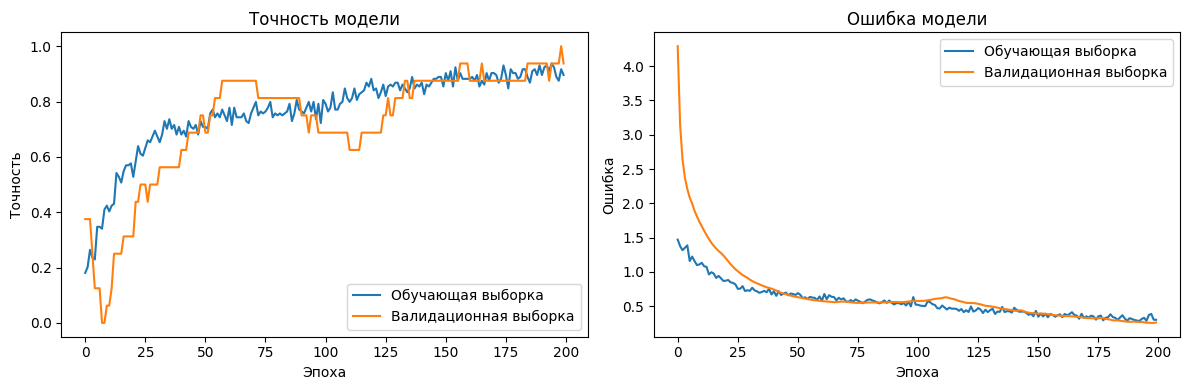

In [8]:
# Построение графиков точности
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# Построение графиков ошибок
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()

plt.tight_layout()
plt.show()
